<a href="https://colab.research.google.com/github/gowthamp-04/Data-Analytics/blob/main/zomato_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Zomato data .csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.shape

(148, 7)

In [ ]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [ ]:
a=df.drop(['name'],axis=1)
a

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Yes,Yes,4.1/5,775,800,Buffet
1,Yes,No,4.1/5,787,800,Buffet
2,Yes,No,3.8/5,918,800,Buffet
3,No,No,3.7/5,88,300,Buffet
4,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...
143,No,No,3.3/5,0,100,Dining
144,No,No,3.3/5,0,150,Dining
145,Yes,No,4.0/5,771,450,Dining
146,No,No,3.0/5,98,800,Dining


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(148, 7)

In [ ]:
def handlerate(value):
    value =str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] =df['rate'].apply(handlerate)
df['rate'].head()

,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8


In [ ]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [ ]:
df.rate.isnull().sum()

0

In [ ]:
df.rename(columns={"approx_cost(for two people)":"cst ppl"},inplace=True)
df.head()

,name,online_order,book_table,rate,votes,cst ppl,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [ ]:
df.count()

,0
name,148
online_order,148
book_table,148
rate,148
votes,148
cst ppl,148
listed_in(type),148


Text(0.5, 0, 'type of retarunt')

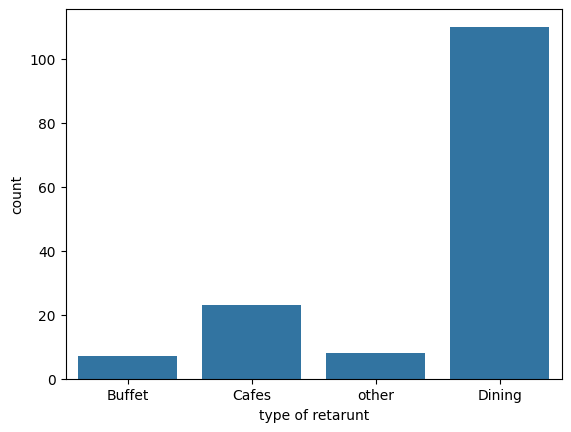

In [ ]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of retarunt")

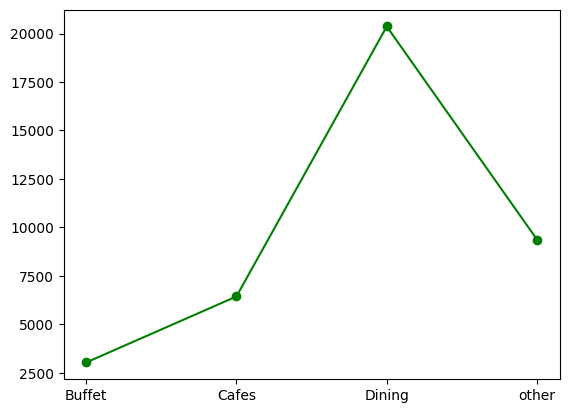

In [ ]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
plt.plot(grouped_data, c="green", marker="o")

In [ ]:
result = pd.DataFrame({'votes': grouped_data})
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


In [ ]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes.head(2))


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


In [ ]:
min_votes= df['votes'].min()
min_votes_restarunt= df.loc[df['votes']==min_votes,'name']

print("Restaurant(s) with the mium votes:")
print(min_votes_restarunt.head(1))

Restaurant(s) with the mium votes:
72    Spicy Tandoor
Name: name, dtype: object


(array([10., 30., 44., 51., 13.]),
 array([2.6, 3. , 3.4, 3.8, 4.2, 4.6]),
 <BarContainer object of 5 artists>)

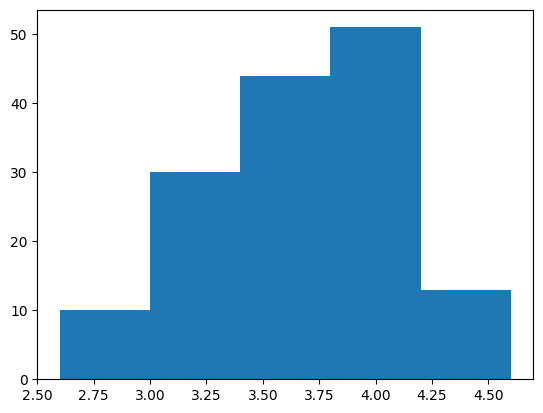

In [ ]:
plt.hist(df['rate'],bins=5)

<Axes: xlabel='cst ppl', ylabel='count'>

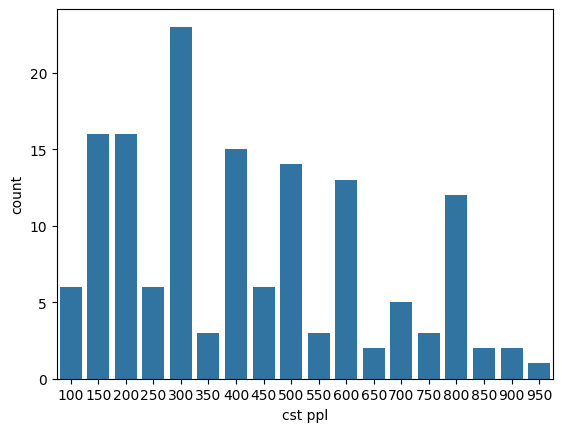

In [ ]:
couple_data=df['cst ppl']
sns.countplot(x=couple_data)


<Axes: xlabel='online_order', ylabel='rate'>

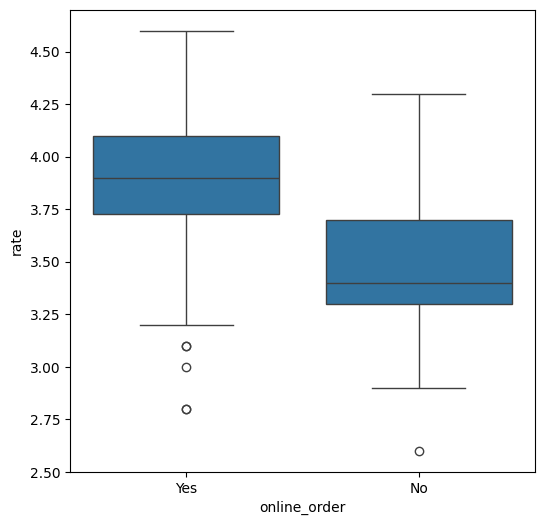

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

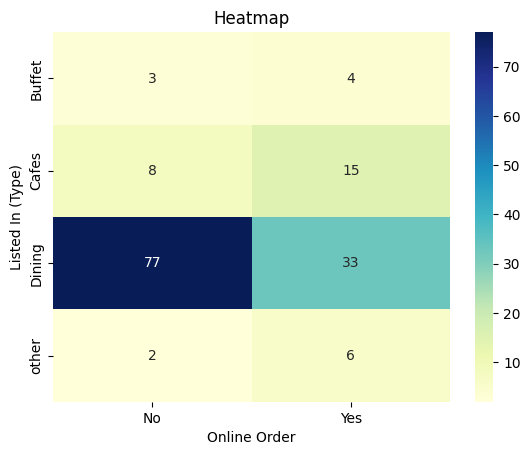

In [ ]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')


plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()
